# Multivariate Thinking

Explore multivariate relationships using multiple regression to describe non-linear relationships and logistic regression to explain and predict binary variables.

In [4]:
# import brfss datasets as DataFrame
import pandas as pd
brfss = pd.read_hdf('C:\\Users\\yazan\\Desktop\\Data_Analytics\\7-Exploratory Data Analysis in Python\\datasets\\brfss.hdf5', 'brfss')
gss = pd.read_hdf('C:\\Users\\yazan\\Desktop\\Data_Analytics\\7-Exploratory Data Analysis in Python\\datasets\\gss.hdf5', 'gss')

# 1. Limits of simple regression

1.1 Regression and causation

In the BRFSS dataset, there is a strong relationship between vegetable consumption and income. The income of people who eat 8 servings of vegetables per day is double the income of people who eat none, on average.

Which of the following conclusions can we draw from this data?

A. Eating a good diet leads to better health and higher income.

B. People with higher income can afford a better diet.

C. People with high income are more likely to be vegetarians.

Answer: is none of above, because this data is consistent with all of these conclusions, but it does not provide conclusive evidence for any of them.

1.2 Using StatsModels

Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.

In [3]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.06988048092105022, intercept=1.5287786243363104, rvalue=0.11967005884864104, pvalue=1.3785039162477718e-238, stderr=0.002110976356332333, intercept_stderr=0.013196467544093607)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


As you see in previous example the statsmodels library give us the same answer as scipy library

# 2. Multiple Regression

2.1 Plot income and education

To get a closer look at the relationship between income and education, let's use the variable 'educ' to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called gss.

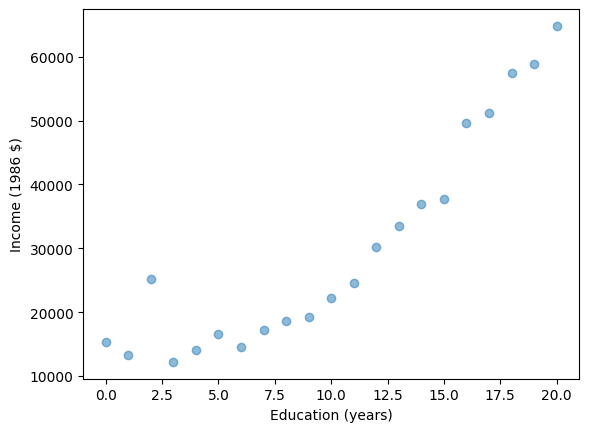

In [5]:
# Import important models
import matplotlib.pyplot as plt

# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

It looks like the relationship between income and education is non-linear.

2.2 Non-linear model of education

The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.